# **Titan Forge - Final Exam**

**Professor Name:** Juan Gonzalez-Espinosa

**Subject:** Advance Analytics

**Student Name:** Ashok Medasani

**Banner ID:** 001374508

**Date:** 03/06/2025

## **Introduction**

**BACKGROUND:**

TitanForge Industries is a leading manufacturer of aerospace components, producing high-precision forged metal parts for aircraft engines. The forging process involves extreme heat, high pressure, and continuous machine operations. To ensure quality control and minimize costly machine failures, TitanForge has implemented an advanced monitoring system to collect real-time data on key machine parameters.

**The Problem**

***Unexpected machine failures can result in:***

  Production halts, leading to delays in aerospace component delivery.
  High maintenance costs due to emergency repairs.
  Material wastage from incomplete or defective parts.
  Safety risks for workers operating near malfunctioning equipment.
  TitanForge’s goal is to develop a predictive maintenance model using machine learning to anticipate failures before they occur, reducing downtime and improving operational efficiency.



**DATASET DESCRIPTION:**

TitanForge has collected 10,000 data points from its forging machines. The dataset includes measurements of environmental and operational factors, along with a Failure_Status variable indicating whether a machine failed during operation (1 = Failure, 0 = No Failure). Get the dataset here Download here.

Each observation represents a single production run, and the dataset includes the following features:

**Feature Explanations**

**Air Temperature (K):**

Measures the temperature inside the manufacturing facility (Kelvin scale).

High temperatures can affect machine performance and material integrity.

**Process Temperature (K):**

The temperature of the forging process, calculated from air temperature + process heat.

Deviations may indicate inefficient heating or cooling system failures.

**Rotational Speed (rpm):**

The speed of the forging press motor in revolutions per minute.

Irregular speeds may suggest mechanical wear or motor issues.

**Torque (Nm):**

The force applied to the press in Newton-meters.

A drop in torque might indicate mechanical slippage, while excessive torque could mean overloaded components.

**Tool Wear (min):**

The operating time of the forging tool before replacement is needed.

Increased wear can cause defective parts and lead to machine breakdowns.

**Failure_Status (Target Variable):**

1 = Machine Failure, 0 = No Failure



##**Data Preprocessing**

In [ ]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Command to tell Python to actually display the graphs
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.linear_model import LinearRegression
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    roc_curve,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

dataset = '/content/drive/MyDrive/Advance Analytics/Final Exam/TitanForge_dataset.xlsx'
data = pd.read_excel(dataset)

In [ ]:
df = data.copy()

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure_Status
0,1,M14860,M,298.100,308.600,1551,42.800,0,1
1,2,L47181,L,298.200,308.700,1408,46.300,3,1
2,3,L47182,L,298.100,308.500,1498,49.400,5,1
3,4,L47183,L,298.200,308.600,1433,39.500,7,1
4,5,L47184,L,298.200,308.700,1408,40.000,9,1


### **Data Cleaning**

In [ ]:
# prompt: count of unique values in df

print(df.nunique())


UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Failure_Status                 2
dtype: int64


In [ ]:
df = df.drop(['UDI', 'Product ID'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure_Status           10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


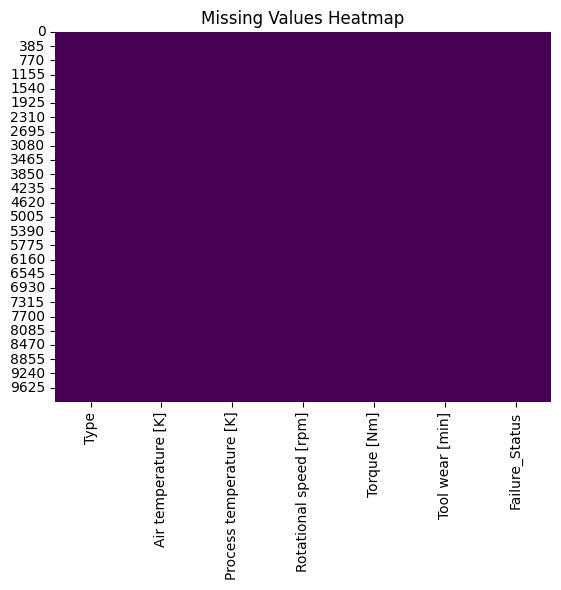

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
print(df['Type'].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


In [ ]:

df = pd.get_dummies(df, columns=['Type'], prefix='Type')


In [ ]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure_Status,Type_H,Type_L,Type_M
0,298.100,308.600,1551,42.800,0,1,False,False,True
1,298.200,308.700,1408,46.300,3,1,False,True,False
2,298.100,308.500,1498,49.400,5,1,False,True,False
3,298.200,308.600,1433,39.500,7,1,False,True,False
4,298.200,308.700,1408,40.000,9,1,False,True,False


### **Outliers**

In [ ]:
# prompt: corr with Failure_Status

# Calculate the correlation between all features and 'Failure_Status'
correlation_matrix = df.corr()
failure_status_corr = correlation_matrix['Failure_Status'].sort_values(ascending=False)

failure_status_corr


,Failure_Status
Failure_Status,1.000
Rotational speed [rpm],0.045
Type_M,0.028
Type_H,0.020
Type_L,-0.038
Process temperature [K],-0.040
Air temperature [K],-0.084
Tool wear [min],-0.105
Torque [Nm],-0.192


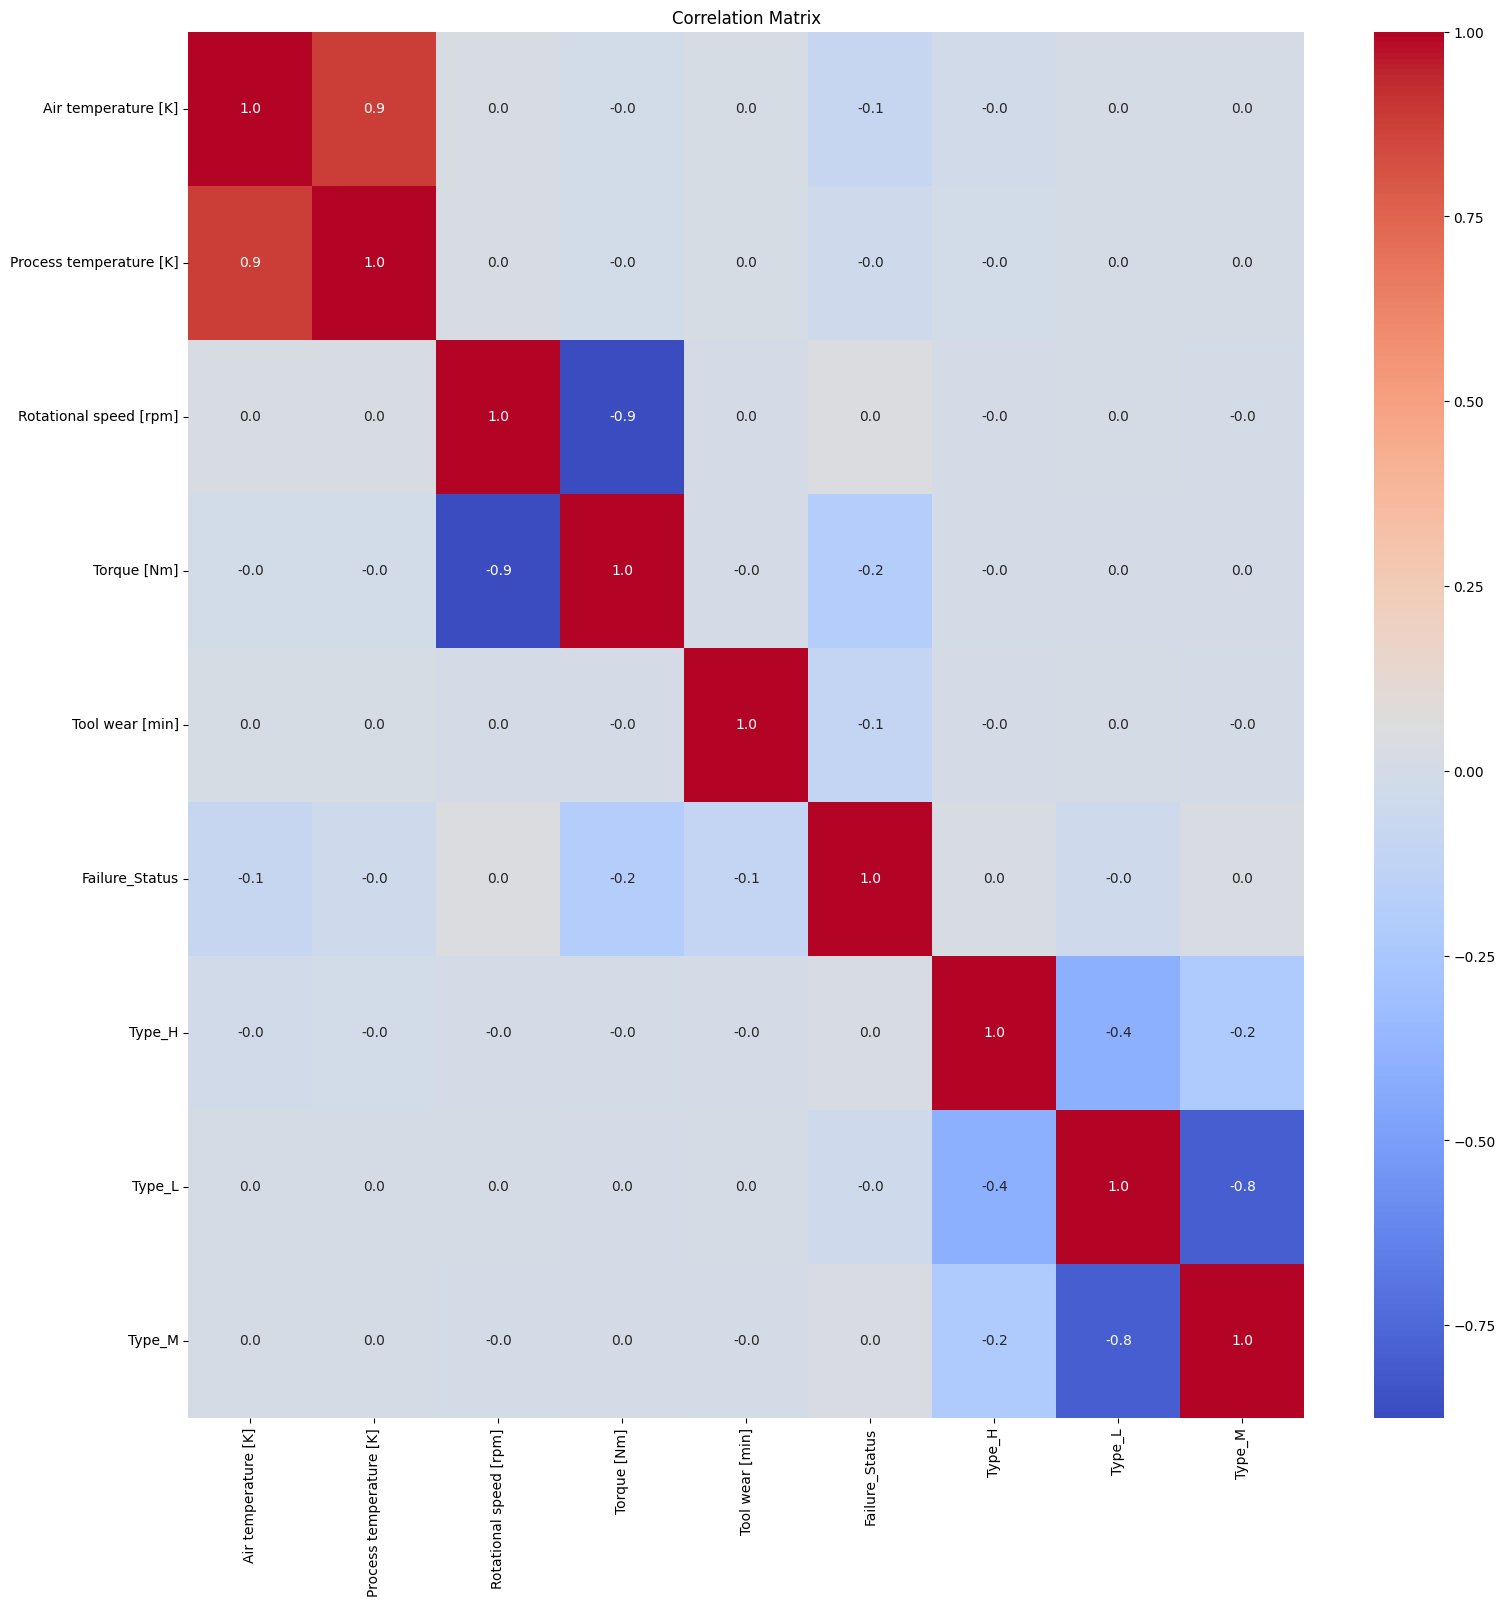

In [ ]:
# Create a heatmap of the correlations
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure_Status
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,300.005,310.006,1538.776,39.987,107.951,0.965
std,2.000,1.484,179.284,9.969,63.654,0.183
min,295.300,305.700,1168.000,3.800,0.000,0.000
25%,298.300,308.800,1423.000,33.200,53.000,1.000
50%,300.100,310.100,1503.000,40.100,108.000,1.000
75%,301.500,311.100,1612.000,46.800,162.000,1.000
max,304.500,313.800,2886.000,76.600,253.000,1.000


Outlier Counts (Using IQR method):
Air temperature [K] - Outliers Count: 0 (0.00%)
Process temperature [K] - Outliers Count: 0 (0.00%)
Rotational speed [rpm] - Outliers Count: 418 (4.18%)
Torque [Nm] - Outliers Count: 69 (0.69%)
Tool wear [min] - Outliers Count: 0 (0.00%)
Failure_Status - Outliers Count: 348 (3.48%)


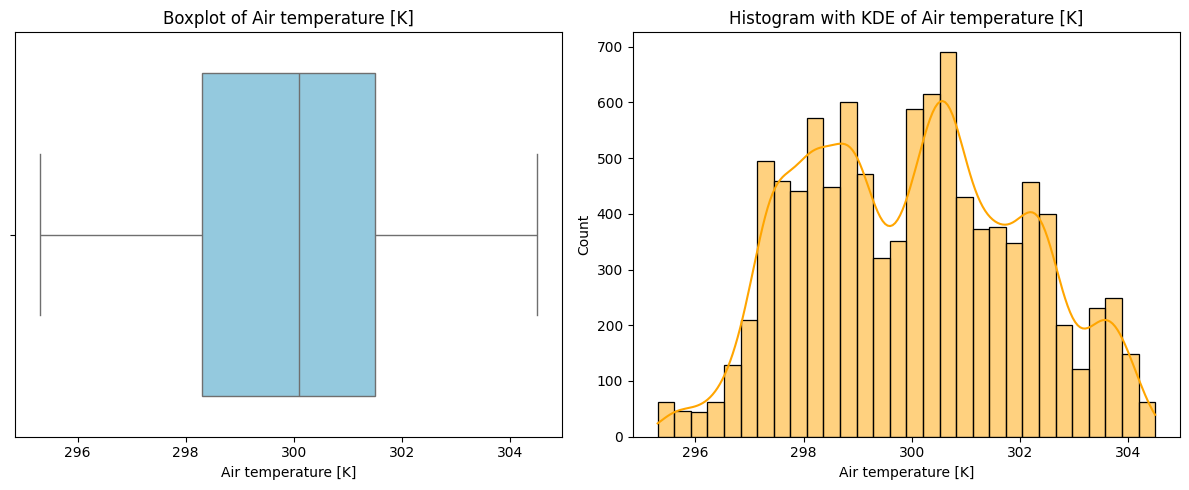

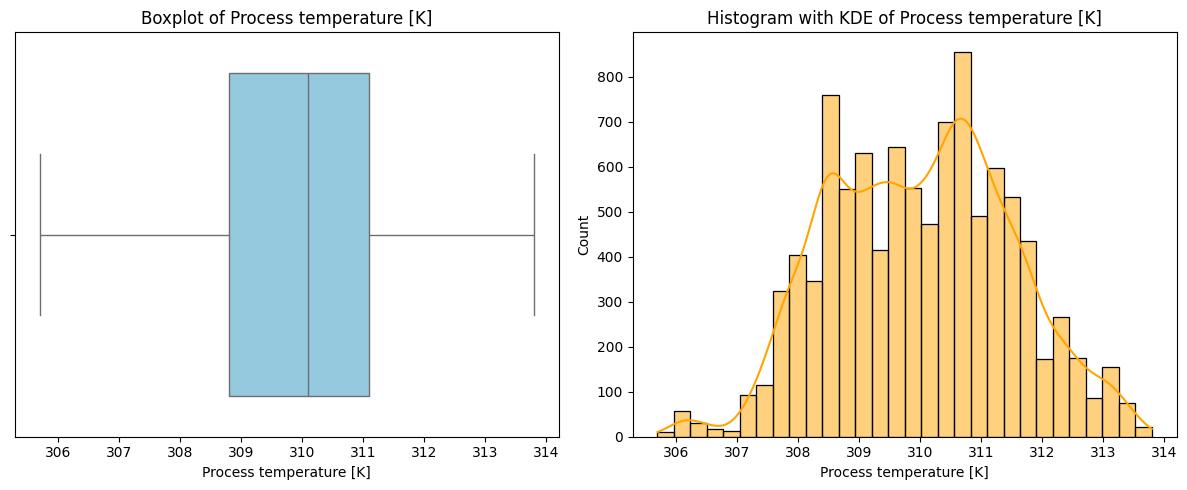

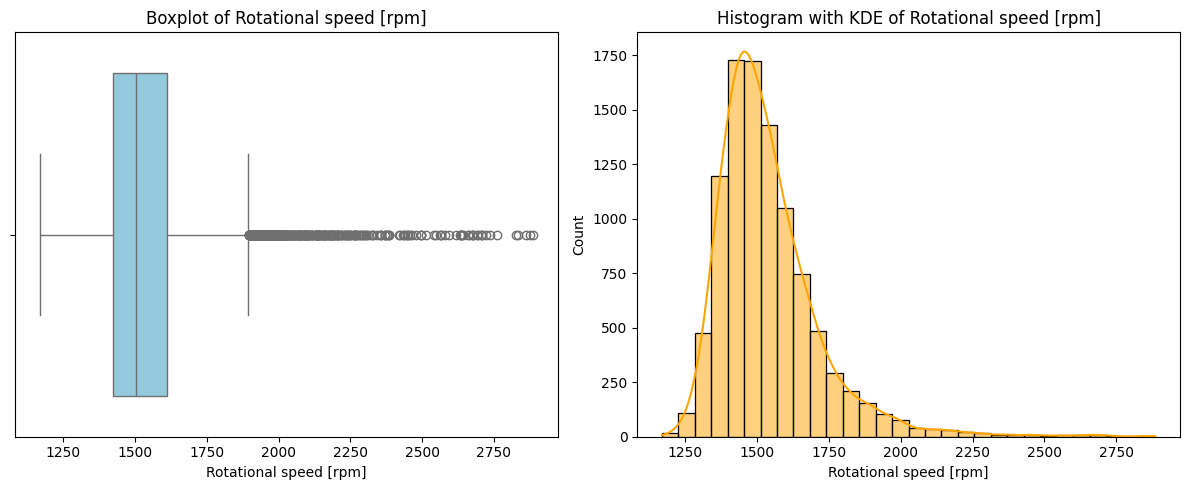

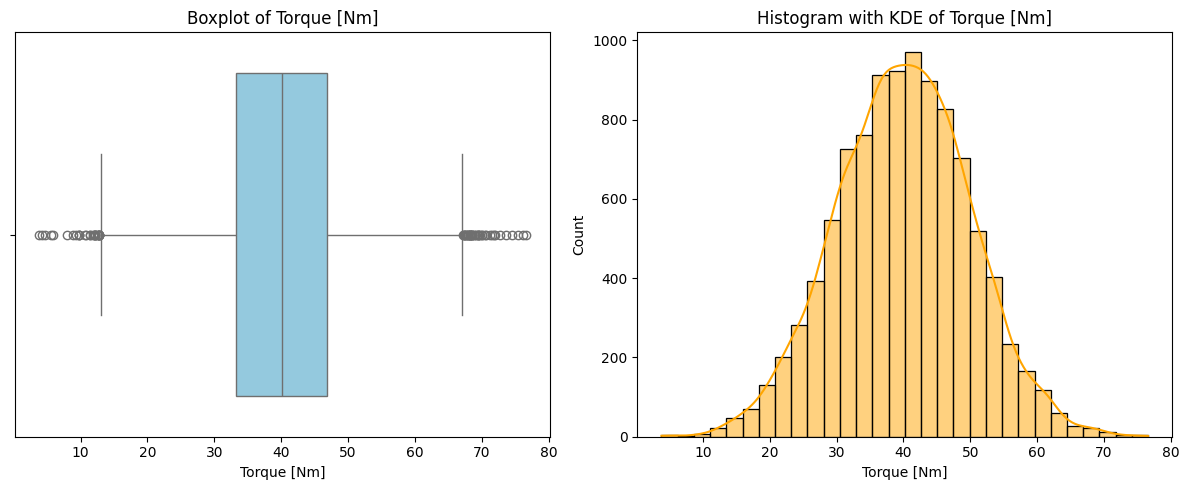

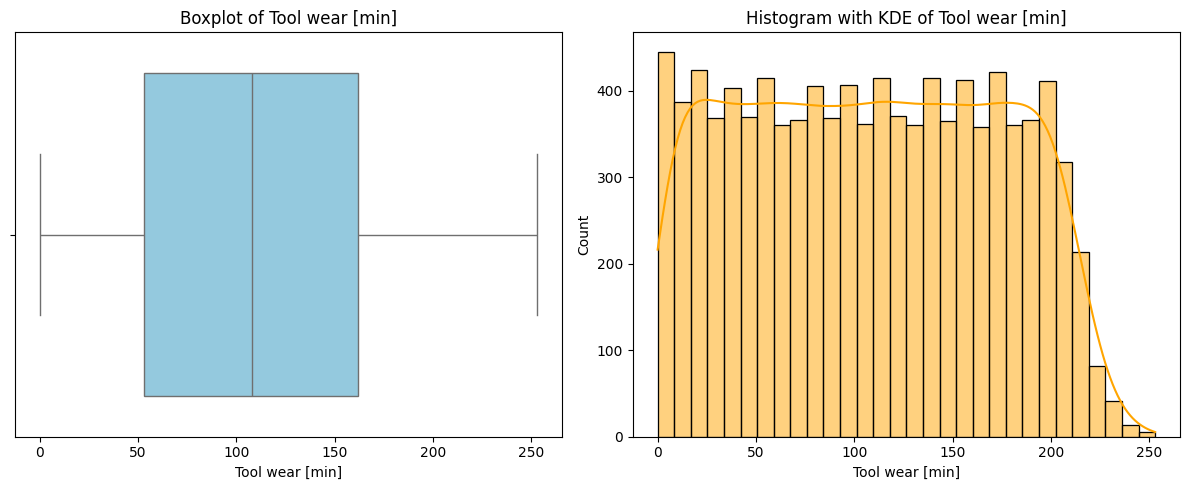

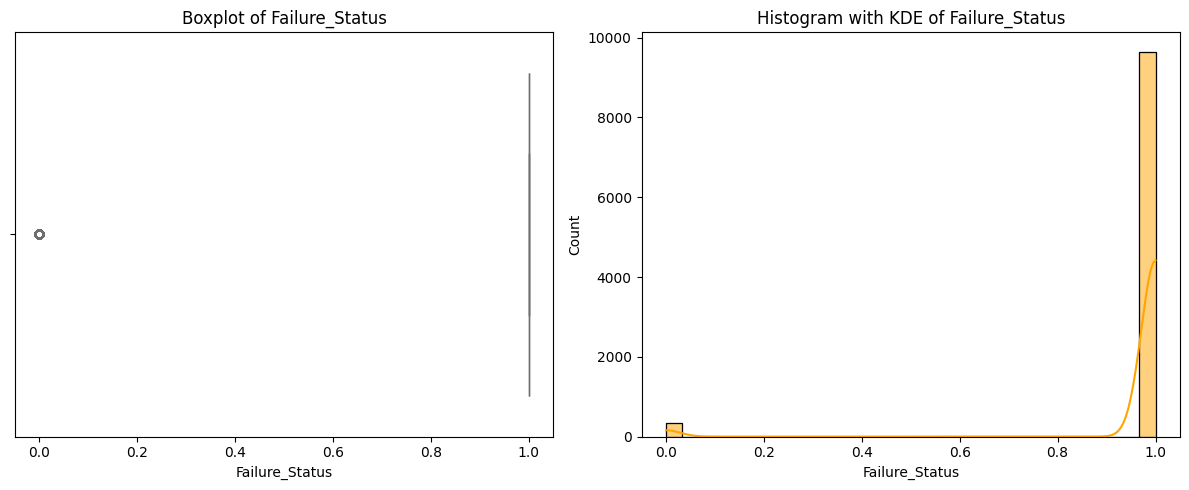

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_outliers_iqr(df):
    outlier_counts = {}
    num_cols = df.select_dtypes(include=['number']).columns  # Select numerical columns
    for col in num_cols:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier conditions
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]  # Count outliers

        # Store outlier count for each column
        outlier_counts[col] = outlier_count

    # Print outlier counts for all columns
    print("Outlier Counts (Using IQR method):")
    for col, count in outlier_counts.items():
        print(f'{col} - Outliers Count: {count} ({count / df.shape[0] * 100:.2f}%)')

    return outlier_counts

def plot_outliers_with_iqr(df):
    # First, calculate outliers and print their counts
    outlier_counts = calculate_outliers_iqr(df)

    # Then, plot the boxplots and histograms with KDE for each numerical variable
    num_cols = df.select_dtypes(include=['number']).columns  # Select numerical columns
    for col in num_cols:
        # Plot Boxplot and Histogram with KDE side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # One row, two columns

        # Horizontal Boxplot (Left)
        sns.boxplot(x=df[col], ax=axes[0], color='skyblue', orient='h')
        axes[0].set_title(f'Boxplot of {col}')
        axes[0].set_xlabel(col)

        # Histogram with KDE (Right)
        sns.histplot(df[col], kde=True, ax=axes[1], color='orange', bins=30)
        axes[1].set_title(f'Histogram with KDE of {col}')
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()

# Run the function
plot_outliers_with_iqr(df)


## **Training & Evaluation of both models with Interpretation of Feature Importance**

In [ ]:
X = df.drop(['Failure_Status'], axis=1)
y = df['Failure_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

def train_test_analysis(model, x_train, y_train, x_test, y_test):
    # Training Data Analysis
    y_train_pred = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_cm = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    # Testing Data Analysis
    y_test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_cm = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    # Create a DataFrame for results
    results = pd.DataFrame({
        'Metric': ['Accuracy', 'Recall', 'Precision', 'F1-score'],
        'Train': [train_acc, train_recall, train_precision, train_f1],
        'Test': [test_acc, test_recall, test_precision, test_f1]
    })

    # Print Classification Reports
    print("Training Classification Report:\n", train_class_report)
    print("Testing Classification Report:\n", test_class_report)

    # Plot confusion matrices
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Reds')
    plt.title('Train Confusion Matrix')
    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds')
    plt.title('Test Confusion Matrix')
    plt.show()

    return results


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.26      0.41       238
           1       0.97      1.00      0.99      6762

    accuracy                           0.97      7000
   macro avg       0.99      0.63      0.70      7000
weighted avg       0.98      0.97      0.97      7000

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.25      0.40       110
           1       0.97      1.00      0.99      2890

    accuracy                           0.97      3000
   macro avg       0.94      0.63      0.69      3000
weighted avg       0.97      0.97      0.96      3000



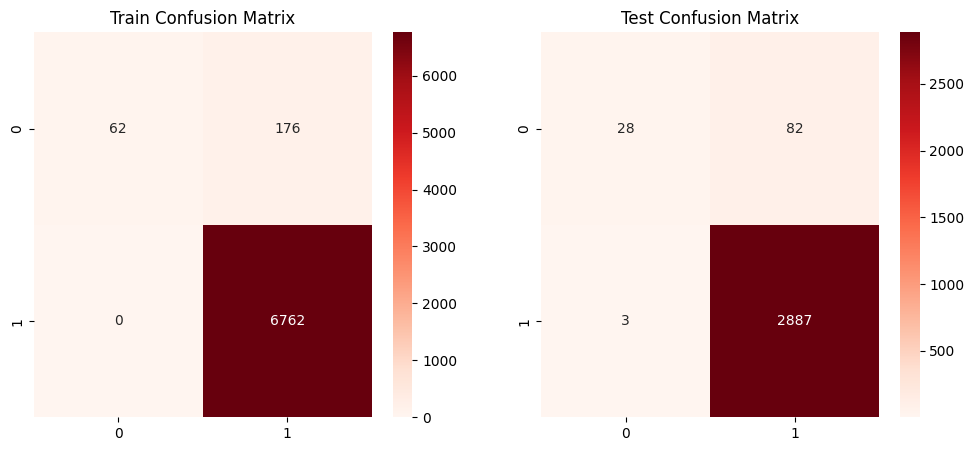

,Metric,Train,Test
0,Accuracy,0.975,0.972
1,Recall,0.975,0.972
2,Precision,0.975,0.970
3,F1-score,0.968,0.964


In [ ]:
analysis_results_rf = train_test_analysis(rf_model, x_train, y_train, x_test, y_test)
analysis_results_rf

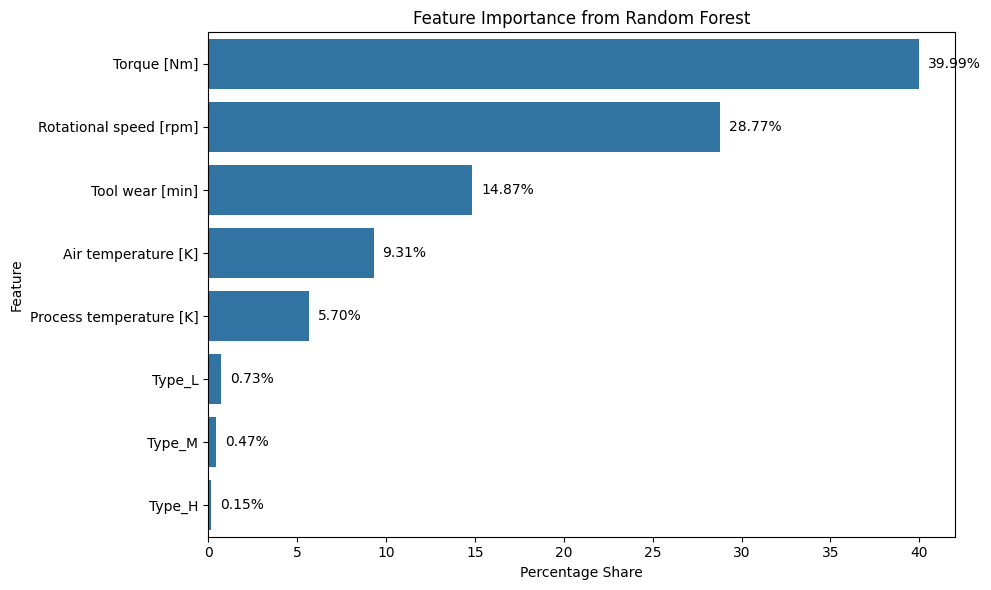

In [ ]:
# prompt: Feature Imporatance graph of analysis_results_rf based on above code and Percentage of share count at last as data label should be outside plot

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'rf_model' and 'x_train' are defined from the previous code

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate percentage share
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100


plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Percentage Share')
plt.ylabel('Feature')

# Annotate with percentage values outside the bars
for i, v in enumerate(feature_importance_df['Percentage']):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center') # Added formatting for two decimal places

plt.tight_layout()
plt.show()



**Feature Importance from Random Forest**"


Torque [Nm] is the most important feature: It has the highest percentage share (39.99%), indicating it's the most influential factor in the model's predictions.

Rotational speed [rpm] is the second most important: With 28.77%, it's still a significant contributor to the model.

Tool wear [min] also plays a substantial role: At 14.87%, it's the third most important feature.

Air temperature [K] and Process temperature [K] have moderate importance: While not as influential as the top three, they still contribute meaningfully to the model (9.31% and 5.70%, respectively).

Type_L, Type_M, and Type_H have very low importance: These categorical features (likely representing different types or categories) have minimal impact on the model's predictions, suggesting they don't significantly differentiate the outcomes.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=5,
    loss='log_loss',
    random_state=1
)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=1)

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93       238
           1       1.00      1.00      1.00      6762

    accuracy                           1.00      7000
   macro avg       1.00      0.93      0.96      7000
weighted avg       1.00      1.00      1.00      7000

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71       110
           1       0.99      0.99      0.99      2890

    accuracy                           0.98      3000
   macro avg       0.90      0.81      0.85      3000
weighted avg       0.98      0.98      0.98      3000



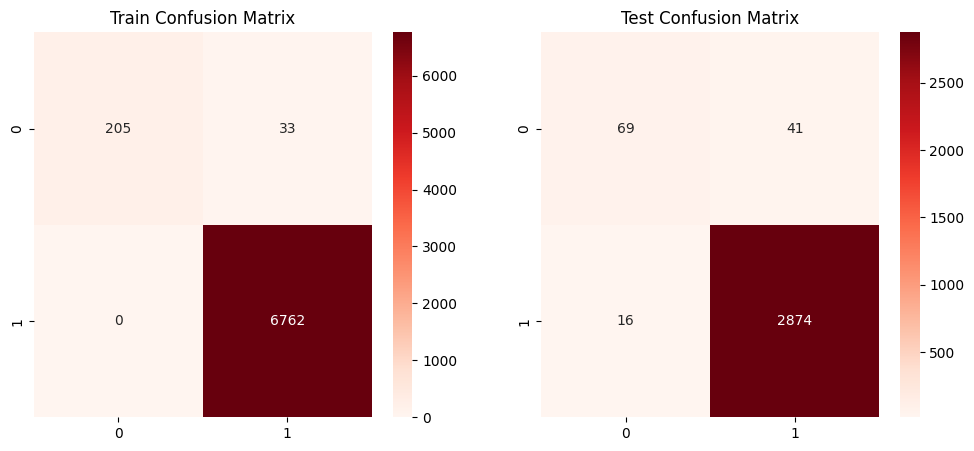

,Metric,Train,Test
0,Accuracy,0.995,0.981
1,Recall,0.995,0.981
2,Precision,0.995,0.980
3,F1-score,0.995,0.980


In [ ]:
analysis_results_gb = train_test_analysis(gb_model, x_train, y_train, x_test, y_test)
analysis_results_gb


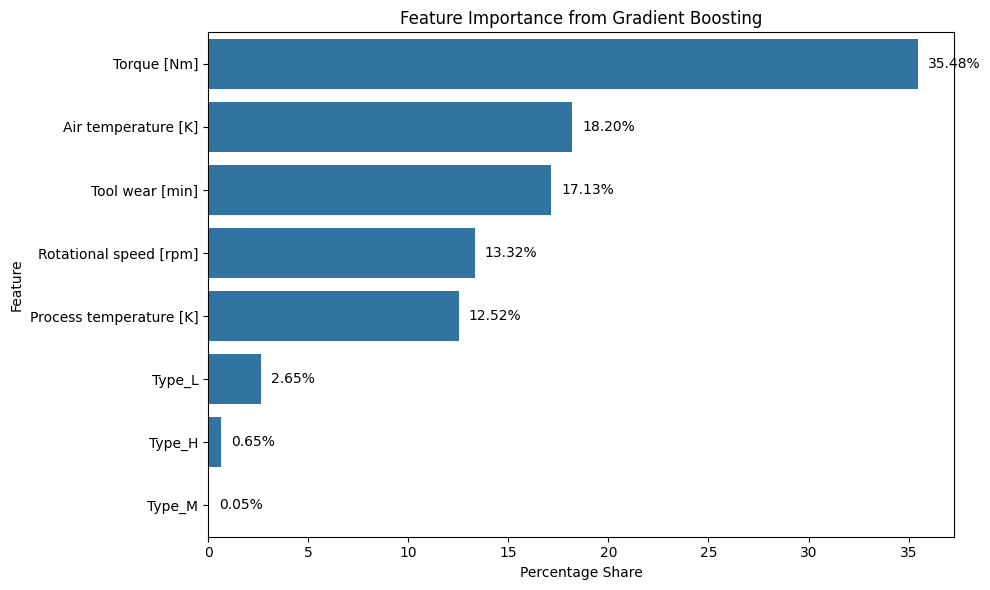

In [ ]:
# prompt: # prompt: Feature Imporatance graph of analysis_results_gb based on above code and Percentage of share count at last as data label should be outside plot

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'gb_model' and 'x_train' are defined from the previous code

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate percentage share
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Gradient Boosting')
plt.xlabel('Percentage Share')
plt.ylabel('Feature')

# Annotate with percentage values outside the bars
for i, v in enumerate(feature_importance_df['Percentage']):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()


**Feature Importance from Gradient Boosting**


Key Observations and Interpretation:

Torque [Nm] is the most important feature: It has the highest percentage share (35.48%), indicating it's the most influential factor in the model's predictions.

Air temperature [K] and Tool wear [min] are also very important: With 18.20% and 17.13%, respectively, they are significant contributors to the model, although not as dominant as Torque.

Rotational speed [rpm] and Process temperature [K] have moderate importance: They contribute meaningfully to the model (13.32% and 12.52%, respectively), but are less influential than the top three.

Type_L, Type_H, and Type_M have very low importance: These categorical features (likely representing different types or categories) have minimal impact on the model's predictions, suggesting they don't significantly differentiate the outcomes.

In [ ]:
# prompt: Combine avg score Accuracy, Precision, recall and F1 results of Random Forest and Gradient Boosting for Test and Train in table

# Create a combined DataFrame
combined_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1-score'],
    'Random Forest Train': analysis_results_rf['Train'],
    'Random Forest Test': analysis_results_rf['Test'],
    'Gradient Boosting Train': analysis_results_gb['Train'],
    'Gradient Boosting Test': analysis_results_gb['Test']
})

# Display the combined table
combined_results


,Metric,Random Forest Train,Random Forest Test,Gradient Boosting Train,Gradient Boosting Test
0,Accuracy,0.975,0.972,0.995,0.981
1,Recall,0.975,0.972,0.995,0.981
2,Precision,0.975,0.970,0.995,0.980
3,F1-score,0.968,0.964,0.995,0.980


In [ ]:
# prompt: Prepare a line chart of results of random forest and Gradient boosting

# Create a DataFrame for the results (replace with your actual results)
results_data = {'Model': ['Random Forest', 'Gradient Boosting'],
                'Accuracy': [analysis_results_rf['Test'][0], analysis_results_gb['Test'][0]],
                'Recall': [analysis_results_rf['Test'][1], analysis_results_gb['Test'][1]],
                'Precision': [analysis_results_rf['Test'][2], analysis_results_gb['Test'][2]],
                'F1-score': [analysis_results_rf['Test'][3], analysis_results_gb['Test'][3]]}
results_df = pd.DataFrame(results_data)

# Melt the DataFrame for plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')


# Create the line chart using Plotly Express
fig = px.line(results_melted, x='Metric', y='Score', color='Model', markers=True,
              title='Model Performance Comparison',
              labels={'Score': 'Score', 'Metric': 'Evaluation Metric', 'Model': 'Model'})
fig.update_layout(xaxis_title="Evaluation Metric", yaxis_title="Score")

fig.show()


**Best Model:**

Based on the metrics, the Gradient Boosting model is the best performing model.


**Higher Accuracy:** Gradient Boosting consistently achieves higher accuracy on both the training and test sets (0.995 and 0.981) compared to Random Forest (0.975 and 0.972).

**Higher Recall:** Gradient Boosting has a higher recall score (0.995 and 0.981) than Random Forest (0.975 and 0.972).

**Higher Precision:** Gradient Boosting also shows higher precision (0.995 and 0.980) than Random Forest (0.975 and 0.970).

**Higher F1-score:** The F1-score, which balances precision and recall, is significantly higher for Gradient Boosting (0.995 and 0.980) compared to Random Forest (0.968 and 0.964).

In summary, **Gradient Boosting** outperforms Random Forest across all metrics, indicating it's the superior model for this task.

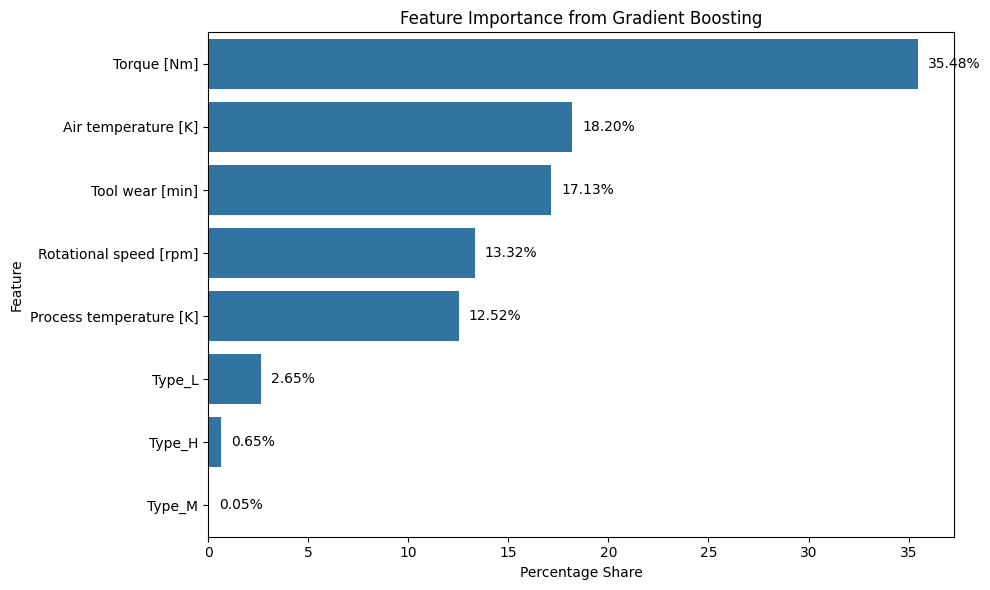

In [ ]:
# prompt: Feature Importance graph of gb

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'gb_model' and 'x_train' are defined from the previous code

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate percentage share
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Gradient Boosting')
plt.xlabel('Percentage Share')
plt.ylabel('Feature')

# Annotate with percentage values outside the bars
for i, v in enumerate(feature_importance_df['Percentage']):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()


Based on the analysis, here are two preventive actions TitanForge Industries can take to minimize machine failures:

1. **Implement Real-Time Torque Monitoring and Control System:**

**Rationale:** This system will enable proactive identification and correction of torque-related issues, preventing failures before they occur.

2. **Optimize Air Temperature Regulation and Implement a Predictive Maintenance Schedule based on Tool Wear**

**Rationale:** By maintaining a stable air temperature, TitanForge can minimize the impact of ambient conditions on machine performance. Implementing predictive maintenance based on tool wear will ensure timely tool replacements, reducing the risk of failures due to worn-out components.